[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vmetsis/cads-cv/blob/main/1.1-elementary_image_operations-part1.ipynb)


# Elementary Image Operations

In this module, we will learn the basics of manipulating images using Python.

Upon completion of this module, you will be able to:

- Load an image from your local file system and display it in your development environment
- Modify an image by changing its color and geometric properties
- Save an image to your local file system.

## Download data

In [1]:
# If running on Google Colab, download the data first.

import os
import sys

def download_files(base_url, files, local_dir):
    if not os.path.exists(local_dir):
        os.makedirs(local_dir)
    for file in files:
        file_url = base_url + file
        os.system(f"wget -q {file_url} -P {local_dir}")

def download_data():
    base_url = "https://raw.githubusercontent.com/vmetsis/cads-cv/main/data/"
    data_files = ["red-throated-barbet.jpg"]
    
    download_files(base_url, data_files, 'data')

if 'google.colab' in sys.modules:
    download_data()

## Loading and displaying an image

Let's load an image. We will use the Python OpenCV library `cv2`.

In [2]:
import numpy as np          # numpy is a package for scientific computing in Python
import cv2 as cv            # cv2 is a package for computer vision in Python

img = cv.imread('data/red-throated-barbet.jpg')

Let's display the image. Although OpenCV has a built-in function to display images, it cannot display images inside Jupyter notebooks. For that reason, we will use the [Matplotlib](https://matplotlib.org/3.5.0/tutorials/introductory/images.html) library to display images. We should note that OpenCV follows the BGR color convention whereas Matplotlib follows the RGB color convention. Thus, for the image to be rendered correctly, we have to make that conversion first.

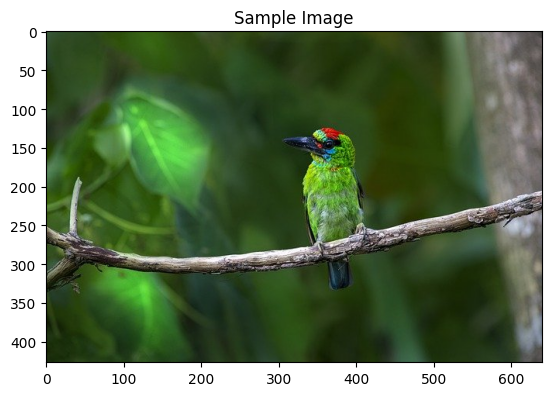

In [3]:
import matplotlib.pyplot as plt # matplotlib is a package for plotting data in Python

# this line is necessary to show the image in the notebook
%matplotlib inline

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)        # Convert from BGR to RGB color scheme

plt.imshow(img_rgb)
plt.title('Sample Image')
plt.show()

Matplotlib by default displayes the axes, which in this case correspond to pixel positions. If we don't want to show the axes, we can turn them off by calling the function `axis('off')`.

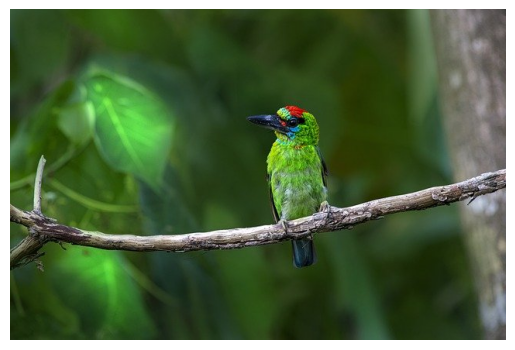

In [4]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### What's in an image?

An image is made of a matrix of pixels. Each pixel has a different color, in a color image, or a different shade of gray, in a grayscale image.

A **grayscale** image is a 2D array (rows x columns) of intensity values. Typically, 8 bits per intensity value.Range from 0 to 255.

A **color** image is three 2D arrays of intensity values for red, green, and blue.

Let's explore the contents of the bird image above.

In [5]:
print(img.shape)

(427, 640, 3)


We notice that the shape of the matrix `img` in which the image was loaded is (427x640x3). That is because the image has a resolution of 427-by-640 pixels and each pixel is made of three values, its Blue, Green, and Red channels.

We can access parts of an image by using numpy array slicing operations. Slicing in python means taking elements from one given index to another given index.

In [6]:
img_patch = img_rgb[120:180, 320:380, :]        # Extract a patch from the image

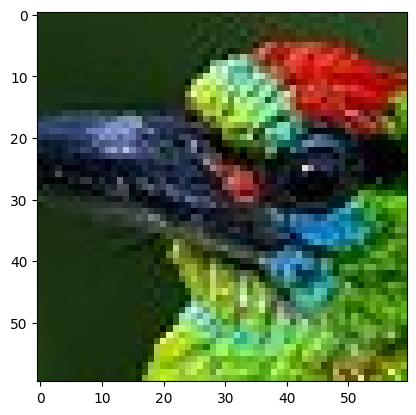

In [7]:
plt.imshow(img_patch)

In [8]:
print(img_patch.shape)

(60, 60, 3)


Let's zoom in further and look at the pixel values of the rows 20:30 and columns 40:50 of the blue channel. As we mentioned earlier, we will notice values ranging from 0 to 255.

In [9]:
print(img_patch[20:30, 40:50, 0])

[[109  15   0   0  42  96  63  35   0   1]
 [ 15  11  21 101 121  88  78  66  54  17]
 [  0  82  38  49   0   0   0   0  34  44]
 [  7   5   0   8  23  18  35  24   0  31]
 [  6  23  31  24  54  50  39  42  33  34]
 [ 34  14  22 225 140  38  59  45  10  35]
 [ 26   1  14  45   0   0   3  25   7  21]
 [ 14   0   3   2   0   4   0   5   5  38]
 [  0   4   0   0  17  13   6   1  18  14]
 [ 32   0   2   0   0   1   8   6  24  27]]


We can also save an image to our file system. For example if we wanted to save the cropped patch:

In [10]:
cv.imwrite('data/patch.png', img_patch)       # Save the patch to a file

True

## Image color spaces and channels

We can access the Blue, Green, and Red values of a particular pixel by a simple array operation, e.g.

In [11]:
print("Blue value at pixel [10, 20]: ", img[10, 20, 0])
print("Green value at pixel [10, 20]: ", img[10, 20, 1])
print("Red value at pixel [10, 20]: ", img[10, 20, 2])

# Or we can extract the blue, green, and red values of pixel [10, 20] all at once
(b, g, r) = img[10, 20, :]
print("Pixel values at pixel [10, 20]: B = {}, G = {}, R = {}".format(b, g, r))

Blue value at pixel [10, 20]:  36
Green value at pixel [10, 20]:  74
Red value at pixel [10, 20]:  46
Pixel values at pixel [10, 20]: B = 36, G = 74, R = 46


Each color channel is made of 8 bits, thus it can take 256 possilbe values, from 0 to 255. 0 denoting the complete absense of that color and 255 the maximum value for that color. Every pixel is made of a combination the color values for the B, G, R channels. 

We can split those three channels into its components (B, G, R)

In [12]:
b,g,r = cv.split(img)            # Split the image into its three channels

In [13]:
print(b.shape)

(427, 640)


We notice that when we print the matrix b of the blue channel, there is no third dimension anymore. We can display each channel separately.

In [14]:
# Print the type of the b channel of the image
print(type(b[0,0]))

<class 'numpy.uint8'>


Let's scale the values of the pixels to the range `[0,1]` and display the three channels separately. We will also normalize the each pixel value for each channel by dividing it by the sum of the three channels `(b+g+r)`. This will take away the total intensity of the pixel and leave us with the relative intensity of each channel.

In [15]:
# Normalize each channel of the image to the range [0, 1]
b_norm = b / 255.0
g_norm = g / 255.0
r_norm = r / 255.0

# Divide by the sum of the channels
epsilon = 1e-10      # A small number to avoid division by zero
b_norm = b_norm / (b_norm + g_norm + r_norm + epsilon)
g_norm = g_norm / (b_norm + g_norm + r_norm + epsilon)
r_norm = r_norm / (b_norm + g_norm + r_norm + epsilon)

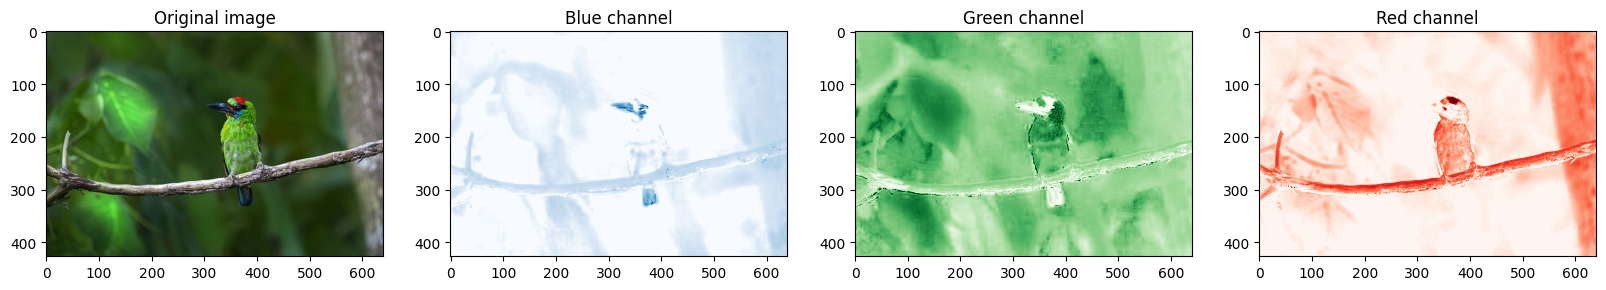

In [16]:
# Specify a size for all subplots
plt.figure(figsize=(20,5))                # Create a figure of size 20x5

# Create subplots of one row and three columns: subplot(nrows, ncols, index, **kwargs)
# For documentation, see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
plt.subplot(1, 4, 1),plt.imshow(img_rgb),plt.title('Original image')
plt.subplot(1, 4, 2),plt.imshow(b_norm, 'Blues', vmin=0.2, vmax=0.7),plt.title('Blue channel')
plt.subplot(1, 4, 3),plt.imshow(g_norm, 'Greens', vmin=0.2, vmax=0.7),plt.title('Green channel')
plt.subplot(1, 4, 4),plt.imshow(r_norm, 'Reds', vmin=0.2, vmax=0.7),plt.title('Red channel')
plt.show()

We can also merge channels.

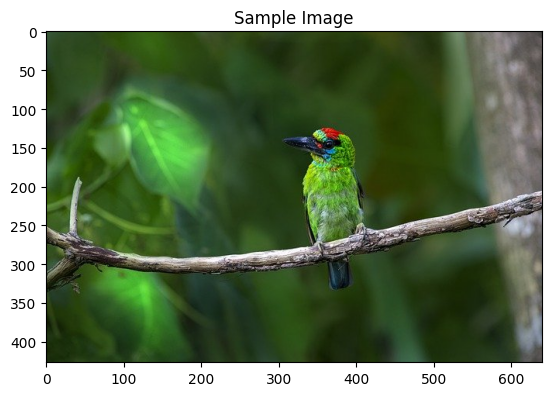

In [17]:
img = cv.merge((b,g,r))                         # Merge the three channels back together
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)    # Convert from BGR to RGB color scheme

plt.imshow(img_rgb)
plt.title('Sample Image')
plt.show()